In [17]:
import tensorflow as tf 
import tensorflow_datasets as tfds

In [40]:
# Downloading the Zalando clothing dataset
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)


In [41]:
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\benna\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
   

In [42]:
# Extract class names from the Zalando dataset
class_names = metadata.features['label'].names
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
# Split the dataset into training and testing sets
train_data, test_data = data['train'], data['test']

# Normalize the data (Convert from 0-255 to 0-1) - originally in 0-255 range due to pixel color values

def normalize(images, labels):
    images = tf.cast(images, tf.float32)  # Convert images to float32 data type
    images /= 255  # Normalize pixel values from 0-255 to 0-1
    return images, labels  # Return normalized images and their labels

# Apply normalization to training and testing data
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

# Cache the datasets (use memory instead of disk for faster training)
train_data = train_data.cache()
test_data = test_data.cache()


    


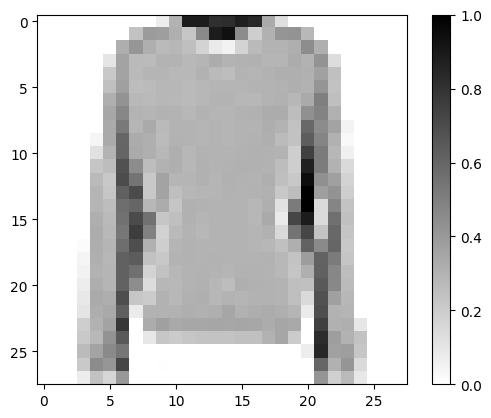

In [44]:
# Display an image from the test data (e.g., the first one)
for image, label in train_data.take(1):
    break
image = image.numpy().reshape((28, 28))  # Reshape the image

import matplotlib.pyplot as plt

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


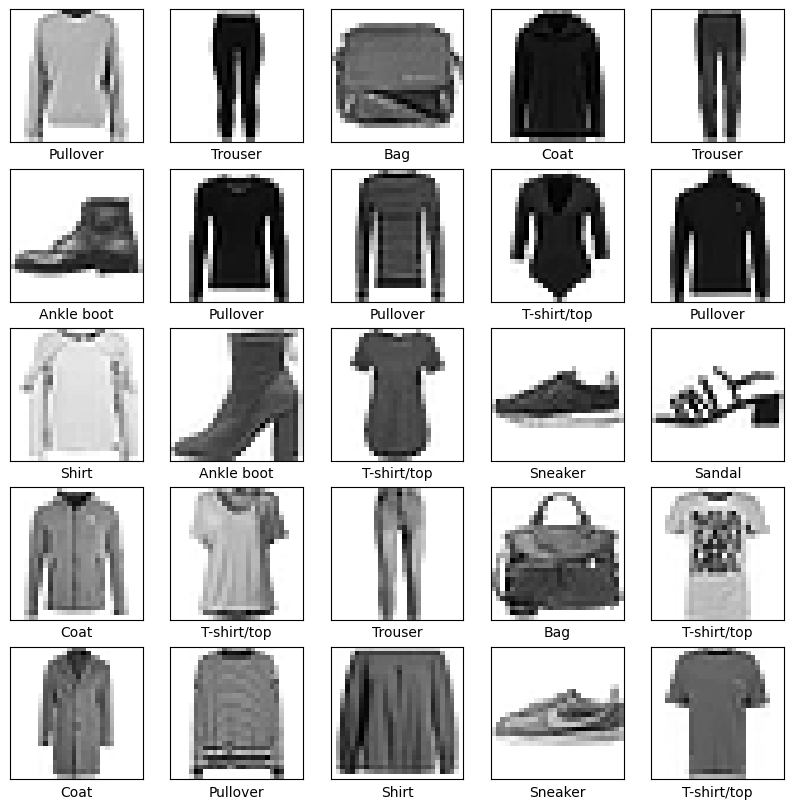

In [45]:
# Display the first 25 clothing items with their labels
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(25)):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()


In [46]:
# Create a Sequential model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # Flatten: Converts a multi-dimensional input array to a one-dimensional array
                                                      # (28, 28, 1) defines the input shape, here images of 28x28 pixels with 1 channel (grayscale)
    tf.keras.layers.Dense(50, activation=tf.nn.relu),  # ReLU function: Converts negative values to zero and passes positive values unchanged
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # For classification networks. Outputs probabilities for each class
])

# Example: For a shirt, the model might output probabilities like:
# 0.8 for shirt, 0.05 for sweater, 0.1 for jacket, and finally the class with the highest probability is chosen (shirt)
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Loss function, suitable for multi-class classification
    metrics=['accuracy']  # Measures the proportion of correct predictions made by the model compared to the total number of predictions
)


In [47]:
# Get the number of training and test examples for use below

num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples

print(num_train_examples)
print(num_test_examples)

# Batch size: Sets the number of data examples to process together in a single training iteration.
# The model will process 32 examples at a time before updating the weights.
BATCH_SIZE = 32

# Prepare training dataset: Repeat indefinitely, shuffle the data randomly, and group into batches of the specified size (32 in this case)
train_data = train_data.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)

# Prepare test dataset: Group into batches of the specified size (32 in this case)
# No shuffling or repeating is used here, as during evaluation, data is generally not shuffled or repeated.
test_data = test_data.batch(BATCH_SIZE)



60000
10000


In [48]:
import math

# Train the model
history = model.fit(
    train_data,  # Training dataset
    epochs=5,  # Number of epochs to train
    steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE)  # Number of steps per epoch
)

# Accuracy of 0.8


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7531 - loss: 0.7126
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8559 - loss: 0.3946
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3454
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8751 - loss: 0.3346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8832 - loss: 0.3187


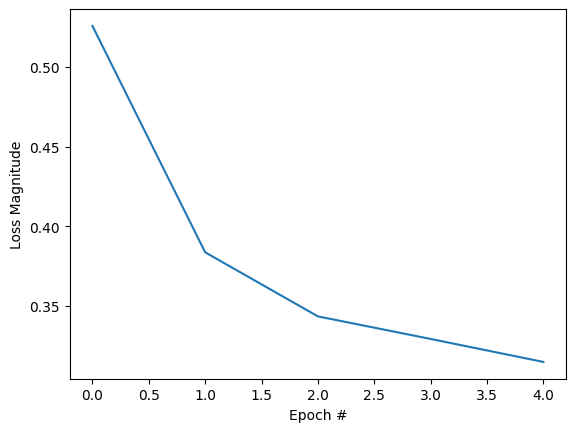

In [49]:
plt.xlabel("Epoch #")
plt.ylabel("Loss Magnitude")
plt.plot(history.history["loss"])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


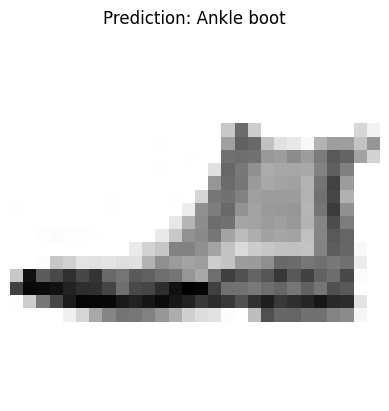

In [50]:
#PREDICTIONS 

import numpy as np
import matplotlib.pyplot as plt

# Take a batch of test data
for test_images, test_labels in test_data.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

# Select a specific image from the test batch
image = test_images[2]  # Select the image at position 2 from the test batch

# Make a prediction for this image
image_array = np.array([image])  # Convert the selected image to a NumPy array with an additional dimension
prediction = model.predict(image_array)

# Display the image along with the prediction
plt.imshow(image.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Prediction: {class_names[np.argmax(prediction[0])]}")
plt.axis('off')
plt.show()
